In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv(r"C:\Users\sam\Desktop\summa\py-master\py-master\ML\14_naive_bayes\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby(df.Category).describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

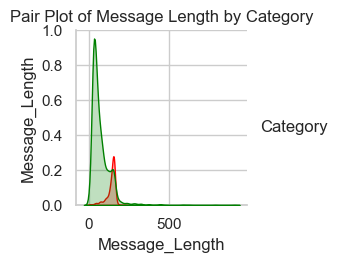

In [14]:


df['Message_Length'] = df['Message'].apply(len)
sns.set(style="whitegrid")
sns.pairplot(df, hue='Category', vars=['Message_Length'], palette={'ham': 'green', 'spam': 'red'})
plt.title('Pair Plot of Message Length by Category')
plt.show()


In [15]:
df['spam']=df.Category.apply(lambda x : 1 if x=='spam' else 0)

In [16]:
df.head()

,Category,Message,Message_Length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.2)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_train_values=cv.fit_transform(X_train.values)
X_train_values.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_values,y_train)

MultinomialNB()

In [20]:
emails=['hey mohan come play football',
        'upto 20% discount on parking, exclusive offer']

emails_count=cv.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [21]:
X_test_values=cv.transform(X_test)
model.score(X_test_values,y_test)

0.9838565022421525

Using Pipeline

In [22]:
from sklearn.pipeline import Pipeline
m=Pipeline([('vectorizer',CountVectorizer()),
           ('nb',MultinomialNB())])

In [23]:
m.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [24]:
m.score(X_test,y_test)

0.9838565022421525

In [25]:
m.predict(emails)

array([0, 1], dtype=int64)

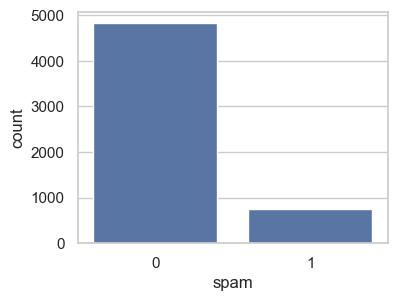

In [26]:
plt.figure(figsize=(4,3))
sns.countplot(x='spam',data=df)
plt.show()